<div style="font-family: Times New Roman; font-size: 18px;">

### Poisson Distribution Example

During a laboratory experiment, the average number of radioactive particles passing
through a counter in 1 millisecond is 4. What is the probability that 6 particles
enter the counter in a given millisecond?


We model the number of particles using a Poisson distribution:

$$
X \sim \text{Poisson}(\lambda = 4)
$$

We want the probability that exactly 6 particles enter the counter in a given millisecond:

$$
P(X = 6) = \frac{e^{-4}4^6}{6!}
$$

Substituting values:

$$
P(X = 6) \approx 0.1042
$$

</div>


P(X = 6) = 0.1041956345670211


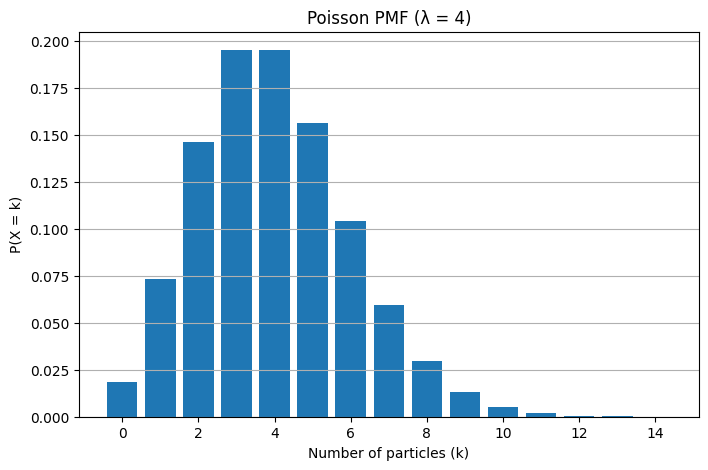

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
from math import factorial, exp

# Given
lam = 4
k = 6

# (1) Compute Poisson probability manually
P_manual = (math.exp(-lam) * lam**k) / math.factorial(k)

print("P(X = 6) =", P_manual)

# (2) Generate Poisson PMF for plotting
k_values = np.arange(0, 15)
pmf_values = [(math.exp(-lam) * lam**i) / math.factorial(i) for i in k_values]

# Bar plot (correct for discrete Poisson distribution)
plt.figure(figsize=(8,5))
plt.bar(k_values, pmf_values)
plt.xlabel("Number of particles (k)")
plt.ylabel("P(X = k)")
plt.title("Poisson PMF (λ = 4)")
plt.grid(True, axis='y')
plt.show()



The Binomial distribution $B(n, p)$ exhibits (or converges to) the Poisson distribution $P(\lambda)$ under a specific set of limiting behavior known as the **Law of Rare Events**.



### 1. Theoretical Conditions (The Limit)

Mathematically, the Binomial distribution $B(n, p)$ converges to the Poisson distribution $P(\lambda)$ under the following strict limits:

* $n \to \infty$: The number of trials ($n$) approaches infinity.
* $p \to 0$: The probability of success ($p$) approaches zero.
* $np \to \lambda$: The product of $n$ and $p$ remains constant (finite). This constant becomes the parameter $\lambda$ (the expected rate) for the Poisson distribution.

$$
\lim_{n \to \infty \atop p \to 0} \binom{n}{k} p^k (1-p)^{n-k} = \frac{\lambda^k e^{-\lambda}}{k!}
$$

### 2. Practical "Rules of Thumb"

Since we cannot have infinite trials in the real world, statisticians use heuristics to decide when it is safe to substitute the Poisson formula for the Binomial one. The approximation is generally considered excellent when:

* $n$ is large: Usually $n \ge 20$ (some strict standards prefer $n \ge 100$).
* $p$ is small: Usually $p \le 0.05$ (or $5\%$).
* $\lambda$ is moderate: The expected value $\lambda = np$ should ideally be $\le 5$ (sometimes cited as $\le 10$).

Number of trials (n): 1000
Probability of success (p): 0.005
Poisson parameter (lambda = n*p): 5.0



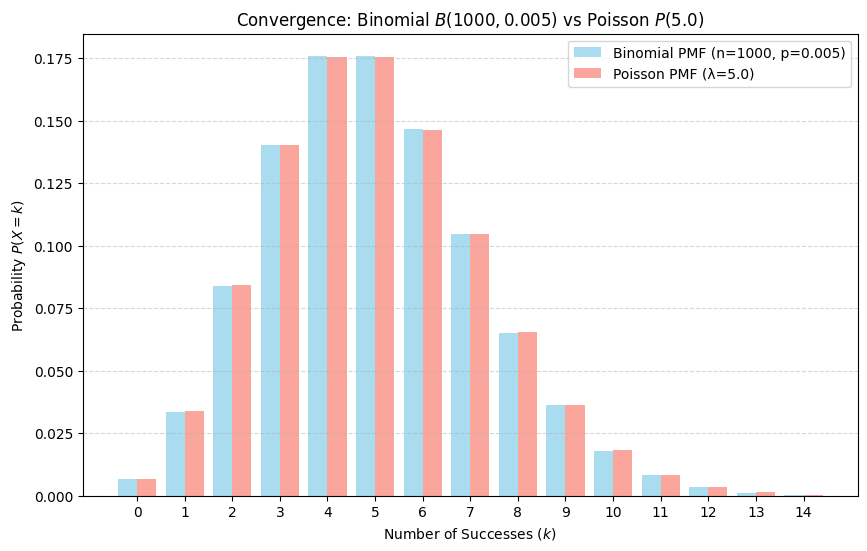


Numerical Comparison (P(X=k)):
k          Binomial (n, p) Poisson (lambda)
1          0.033437        0.033690       
5          0.175908        0.175467       
10         0.017996        0.018133       


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# 1. Define the parameters for the Law of Rare Events
# We want: n (trials) to be large, p (probability) to be small.
# The mean lambda (expected value) should be moderate.
n = 1000       # Large number of trials
p = 0.005      # Small probability of success
lambda_val = n * p # Constant lambda (expected rate)

# Verify the lambda value
print(f"Number of trials (n): {n}")
print(f"Probability of success (p): {p}")
print(f"Poisson parameter (lambda = n*p): {lambda_val}\n")

# 2. Define the range of k values (number of successes) to plot
# k should cover the region where the probability is non-zero
k_range = np.arange(0, 15)

# 3. Calculate the probabilities using both distributions

# Binomial Distribution: B(n, p)
binomial_pmf = binom.pmf(k_range, n, p)

# Poisson Distribution: P(lambda)
poisson_pmf = poisson.pmf(k_range, lambda_val)

# 4. Plot the results for visual comparison
plt.figure(figsize=(10, 6))

# Plotting the Binomial Distribution
plt.bar(k_range - 0.2, binomial_pmf, width=0.4, label='Binomial PMF (n=1000, p=0.005)', color='skyblue', alpha=0.7)

# Plotting the Poisson Distribution (the approximation)
plt.bar(k_range + 0.2, poisson_pmf, width=0.4, label=f'Poisson PMF (λ={lambda_val})', color='salmon', alpha=0.7)

# 5. Add context and labels
plt.title(f'Convergence: Binomial $B({n}, {p})$ vs Poisson $P({lambda_val})$')
plt.xlabel('Number of Successes ($k$)')
plt.ylabel('Probability $P(X=k)$')
plt.xticks(k_range)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 6. Optional: Show numerical comparison for a few k values
print("\nNumerical Comparison (P(X=k)):")
print("{:<10} {:<15} {:<15}".format('k', 'Binomial (n, p)', 'Poisson (lambda)'))
for k in [1, 5, 10]:
    b_val = binom.pmf(k, n, p)
    p_val = poisson.pmf(k, lambda_val)
    print("{:<10} {:<15.6f} {:<15.6f}".format(k, b_val, p_val))

The Poisson distribution itself becomes bell-shaped simply as its mean ($\lambda$) grows large

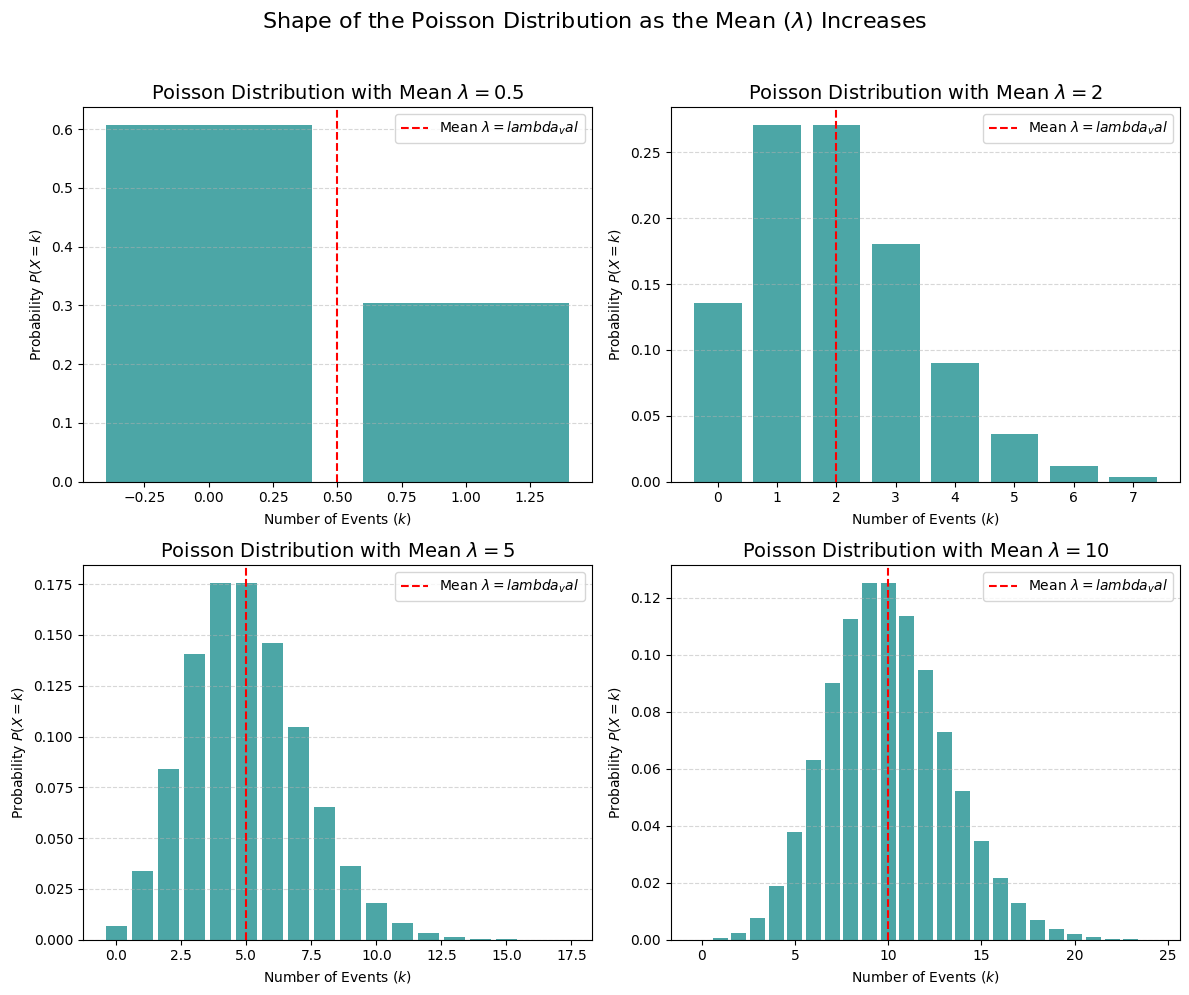

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define the lambda (mean) values to illustrate the change in shape
lambda_values = [0.5, 2, 5, 10]

# Define the maximum k value to plot for each lambda
max_k = 25
k_range = np.arange(0, max_k)

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=False)
axes = axes.flatten()

# Loop through the lambda values and plot the PMF
for i, lambda_val in enumerate(lambda_values):
    ax = axes[i]

    # Restrict k_range to better fit the data when lambda is small
    if lambda_val <= 5:
        # Extend the range up to about 3.5 * lambda for small means
        current_k_range = np.arange(0, int(lambda_val * 3.5) + 1)
    else:
        # Use a fixed range for larger means
        current_k_range = np.arange(0, 25)

    # Calculate the Poisson PMF
    poisson_pmf = poisson.pmf(current_k_range, lambda_val)

    # Plot the results
    ax.bar(current_k_range, poisson_pmf, color='teal', alpha=0.7)

    # Add a vertical line at the mean
    # Note: Using r'' (raw string) fixes the SyntaxWarning
    ax.axvline(lambda_val, color='red', linestyle='--', label=r'Mean $\lambda={lambda_val}$')

    # Add context and labels
    # Note: Using r'' (raw string) fixes the SyntaxWarning
    ax.set_title(r'Poisson Distribution with Mean $\lambda = {lambda_val}$'.format(lambda_val=lambda_val), fontsize=14)
    ax.set_xlabel('Number of Events ($k$)')
    ax.set_ylabel('Probability $P(X=k)$')
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# Set overall title
# Note: Using r'' (raw string) fixes the SyntaxWarning
fig.suptitle(r'Shape of the Poisson Distribution as the Mean ($\lambda$) Increases', fontsize=16, y=1.02)

plt.tight_layout(rect=[0, 0.03, 1, 1.0])
plt.show()

### Poisson Distribution – Inventory Demand Problem

**Question**

An inventory study determines that, on average, demands for a particular item at a warehouse  
are made **5 times per day**. What is the probability that on a given day this item is requested:

(a) **more than 5 times?**  
(b) **not at all?**

---

### Poisson Model

We model the number of daily requests using a Poisson distribution:

$$
X \sim \text{Poisson}(\lambda = 5)
$$

---

### (a) Probability the item is requested more than 5 times

We compute:

$$
P(X > 5) = 1 - P(X \le 5)
$$

The cumulative probability up to 5 is:

$$
P(X \le 5) = \sum_{k=0}^{5} \frac{e^{-5}5^k}{k!}
$$

Thus:

$$
P(X > 5) \approx 0.3840
$$

---

### (b) Probability the item is **not requested at all**

For \( X = 0 \):

$$
P(X = 0) = \frac{e^{-5}5^0}{0!} = e^{-5}
$$

$$
P(X = 0) \approx 0.0067
$$

---

### Final Answers

1. **(a)** \( P(X > 5) \approx 0.3840 \)  
2. **(b)** \( P(X = 0) \approx 0.0067 \)

Interpretation:  
- There is about a **38.4% chance** that the item is requested **more than 5 times** in a day.  
- There is only a **0.67% chance** that it is **not requested at all**.

---


P(X > 5) = 0.38403934516693683
P(X = 0) = 0.006737946999085467


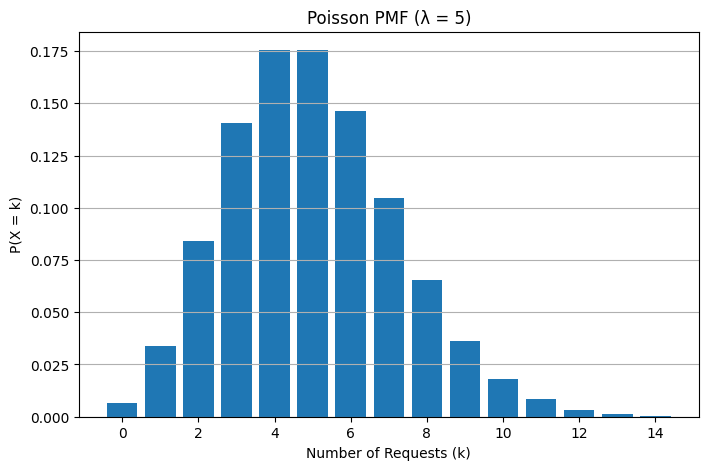

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
from math import factorial, exp

lam = 5  # average demand per day

# (a) P(X > 5)
p_le_5 = sum((math.exp(-lam) * lam**k) / math.factorial(k) for k in range(0, 6))
p_a = 1 - p_le_5

# (b) P(X = 0)
p_b = math.exp(-lam)

print("P(X > 5) =", p_a)
print("P(X = 0) =", p_b)

# Poisson PMF for plotting
k_values = np.arange(0, 15)
pmf_values = [(math.exp(-lam) * lam**k) / math.factorial(k) for k in k_values]

# Bar plot
plt.figure(figsize=(8,5))
plt.bar(k_values, pmf_values)
plt.xlabel("Number of Requests (k)")
plt.ylabel("P(X = k)")
plt.title("Poisson PMF (λ = 5)")
plt.grid(True, axis='y')
plt.show()


In [10]:
(1/4)**10

9.5367431640625e-07